In [8]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report 
import joblib
import strealmit as st 

In [9]:
# Load Data and Read this data
bc= pd.read_csv('breast cancer classification.csv')

In [10]:
bc.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [10]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [11]:
bc.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [12]:
bc.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


<Axes: title={'center': 'Classification Count'}, xlabel='Classification', ylabel='count'>

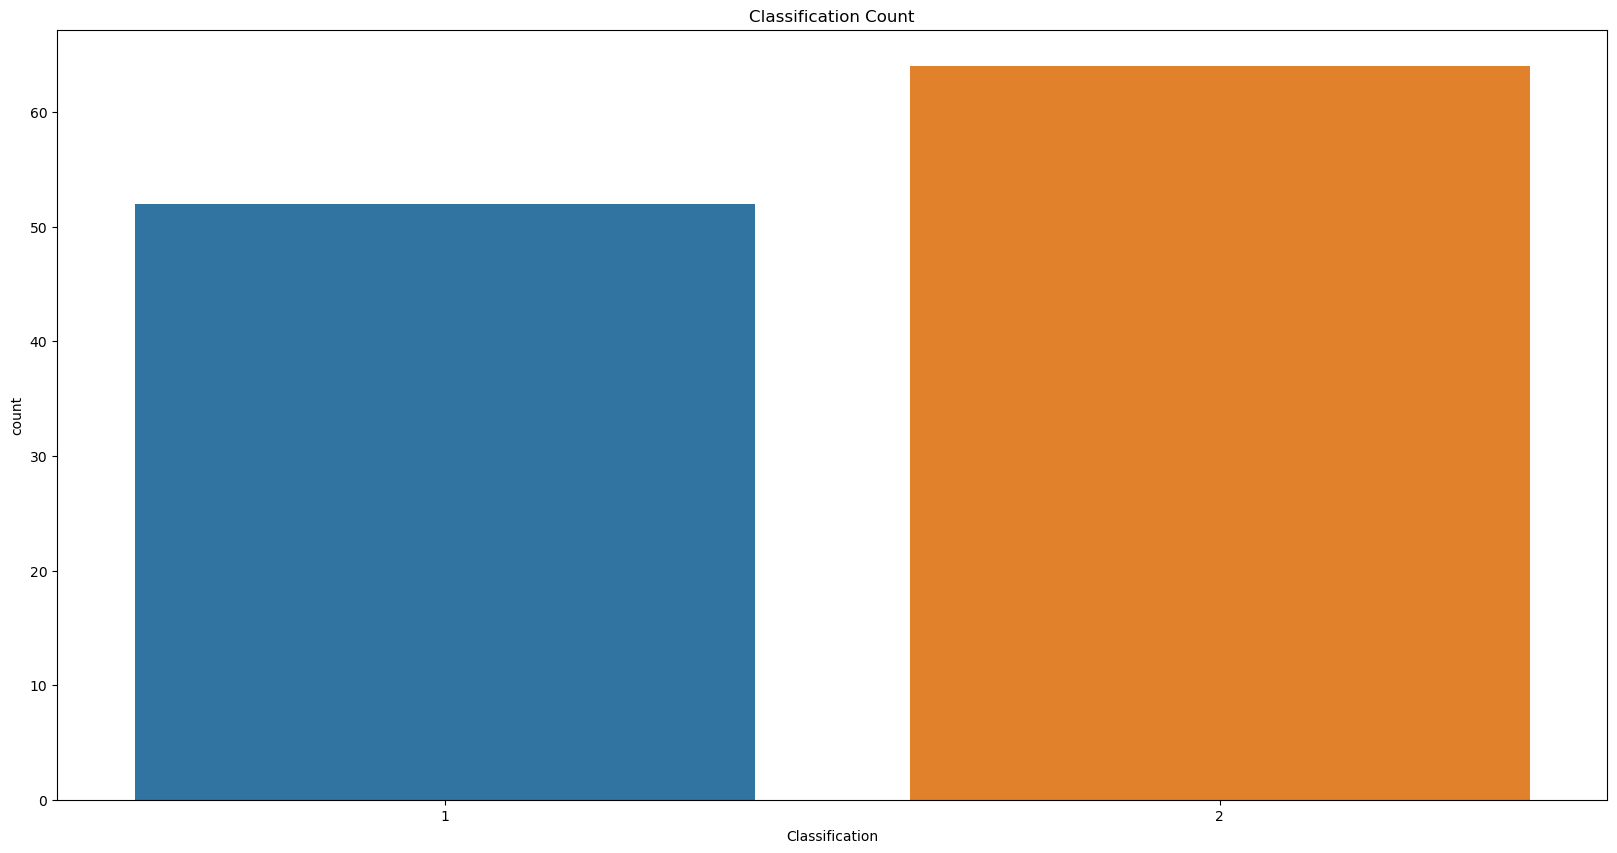

In [13]:
plt.figure(figsize=(20,10))
plt.title('Classification Count')
sns.countplot(data=bc, x ='Classification')



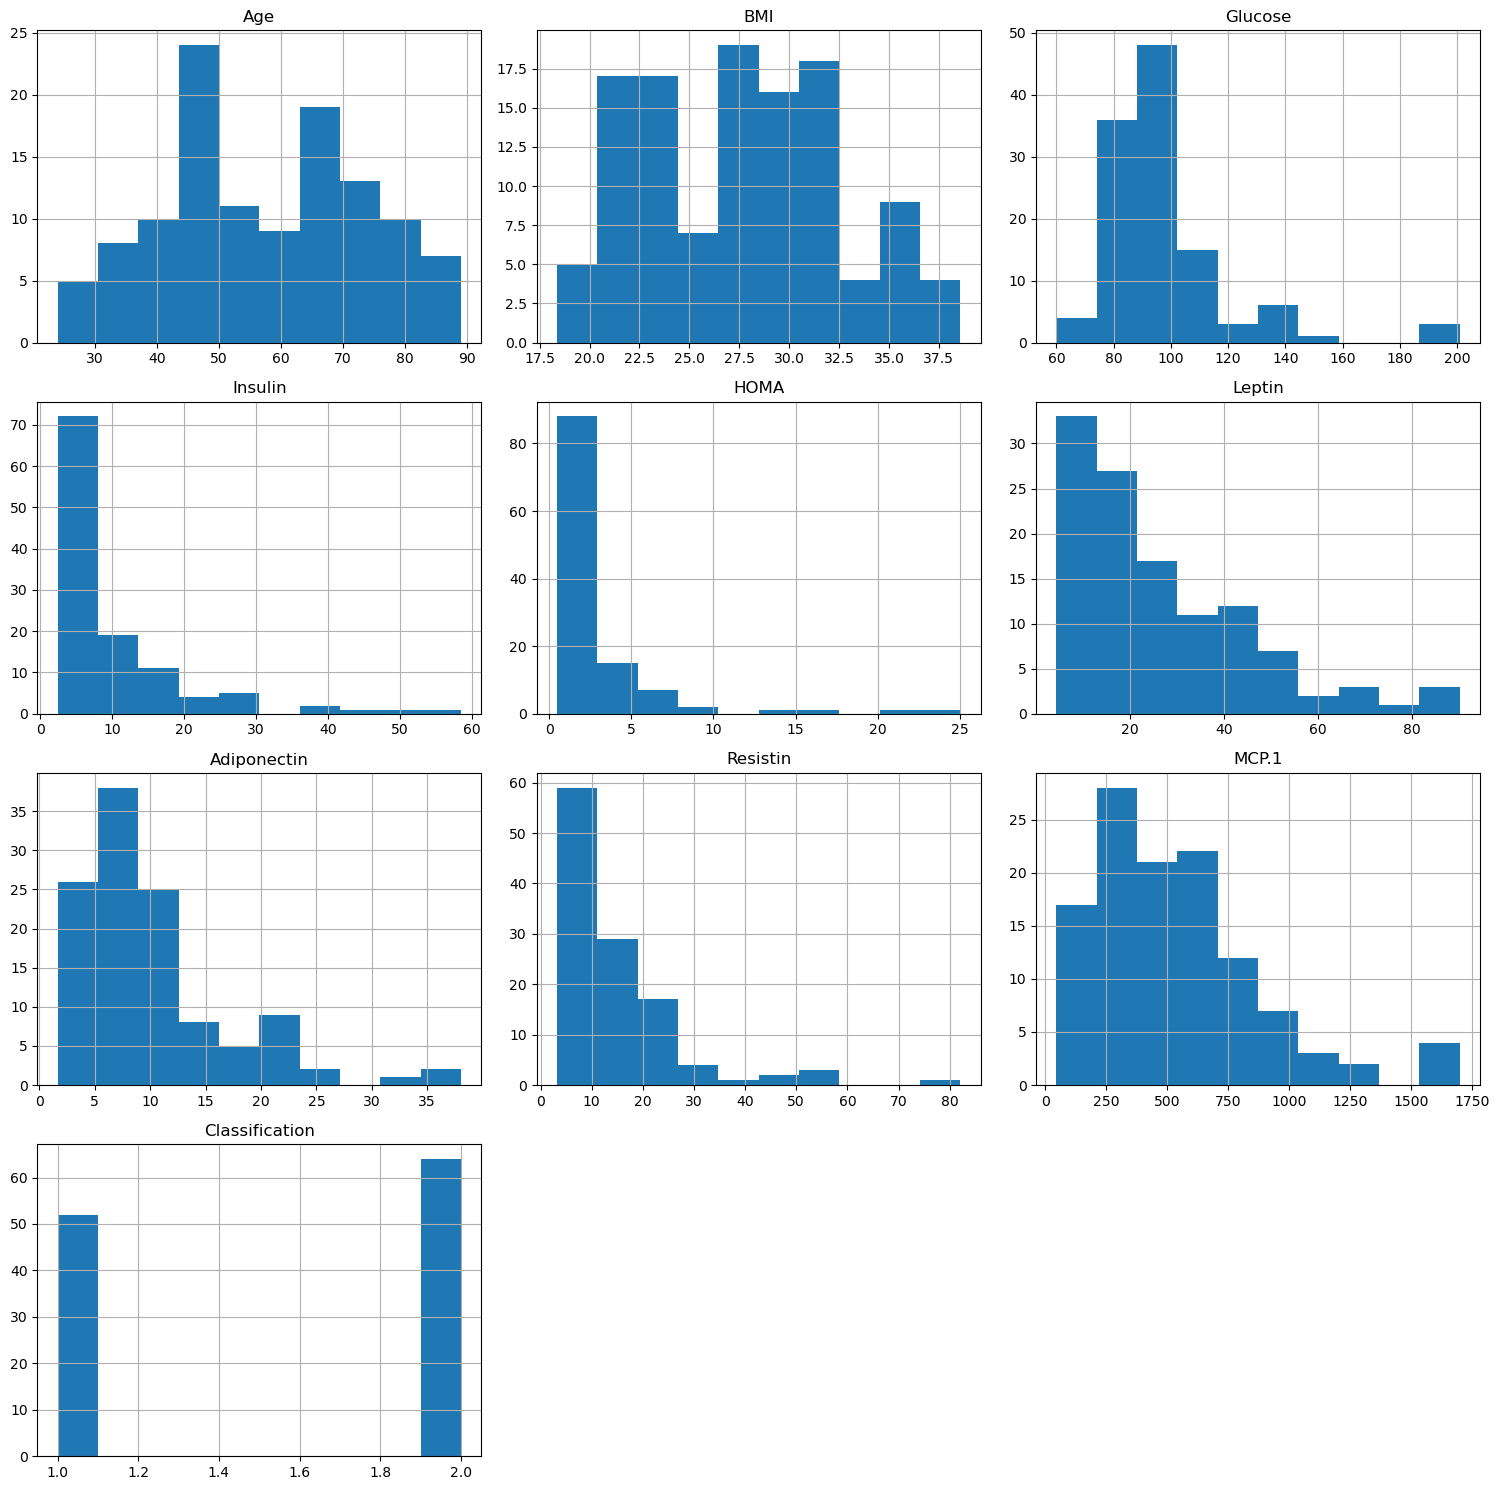

In [14]:
bc.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

C:\Users\ENG.Elaf\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


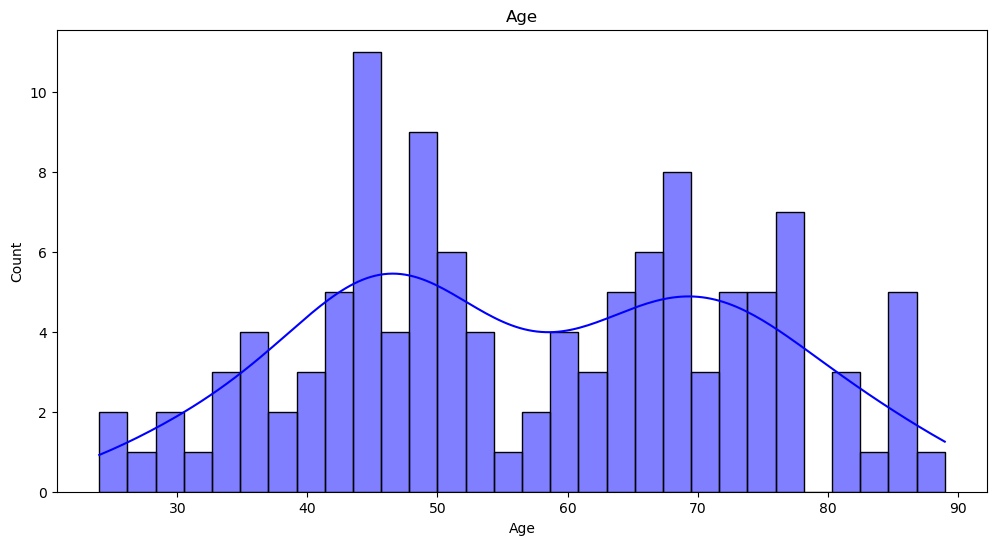

In [15]:
# Plotting the distribution of 'Age' column
plt.figure(figsize=(12, 6))
sns.histplot(data=bc, x='Age', bins=30, kde=True, color='blue')
plt.title('Age')
plt.show()

In [10]:
bc['Age'].max()

89

In [11]:
bc[bc['Age'] == 89]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
6,89,22.7,77,4.69,0.890787,6.964,5.589865,12.9361,1256.083,1


In [16]:
bc[bc['Age'] >= 80]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
49,85,26.600000,96,4.462,1.056602,7.8500,7.931700,9.61350,232.006,1
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,2
81,81,31.640368,100,9.669,2.385020,38.8066,10.636525,29.55830,426.175,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2
91,82,31.217482,100,18.077,4.458993,31.6453,9.923650,19.94687,994.316,2
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,2


In [17]:
bc[bc['Glucose']>=160]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.3701,1698.440,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.2153,1078.359,2
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.6308,1698.440,2


In [18]:
bc.drop([78, 87,88], inplace = True)

In [19]:
bc[bc['Resistin']>=60]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.1,263.499,1


In [20]:
bc.drop([37], inplace = True)

In [21]:
bc[bc['MCP.1']>=1500]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
85,65,29.666548,85,14.649,3.071407,26.5166,7.28287,19.46324,1698.44,2
86,48,28.125000,90,2.540,0.563880,15.5325,10.22231,16.11032,1698.44,2


In [22]:
bc.drop([85, 86], inplace = True)

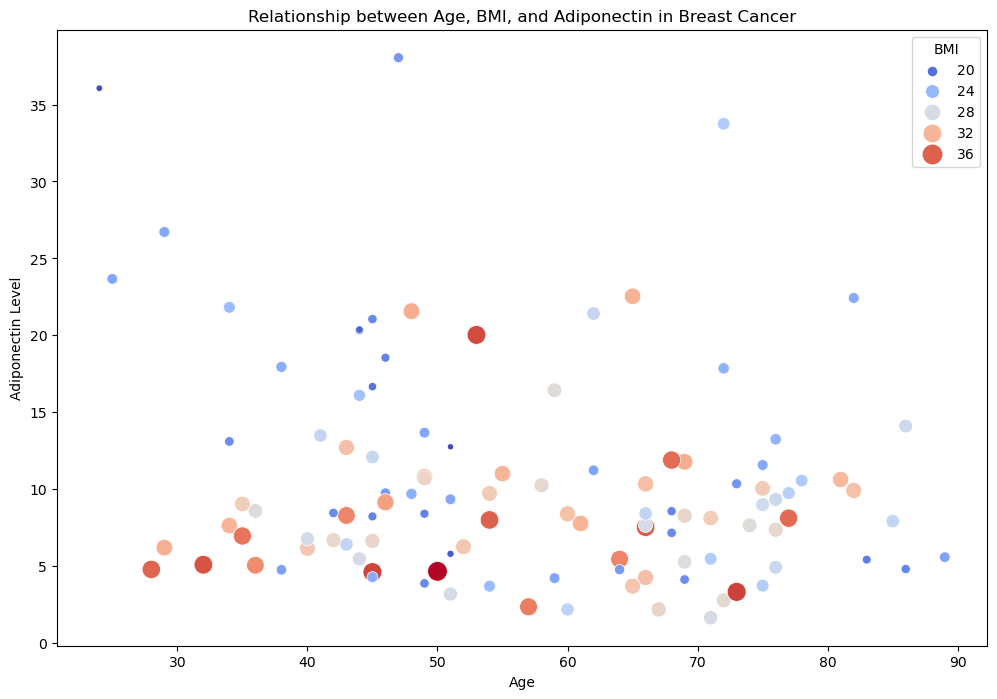

In [23]:
# Scatter plot to visualize the relationship between Age, BMI, and Adiponectin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Age', y='Adiponectin', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Age, BMI, and Adiponectin in Breast Cancer')
plt.xlabel('Age')
plt.ylabel('Adiponectin Level')
plt.legend(title='BMI')
plt.show()

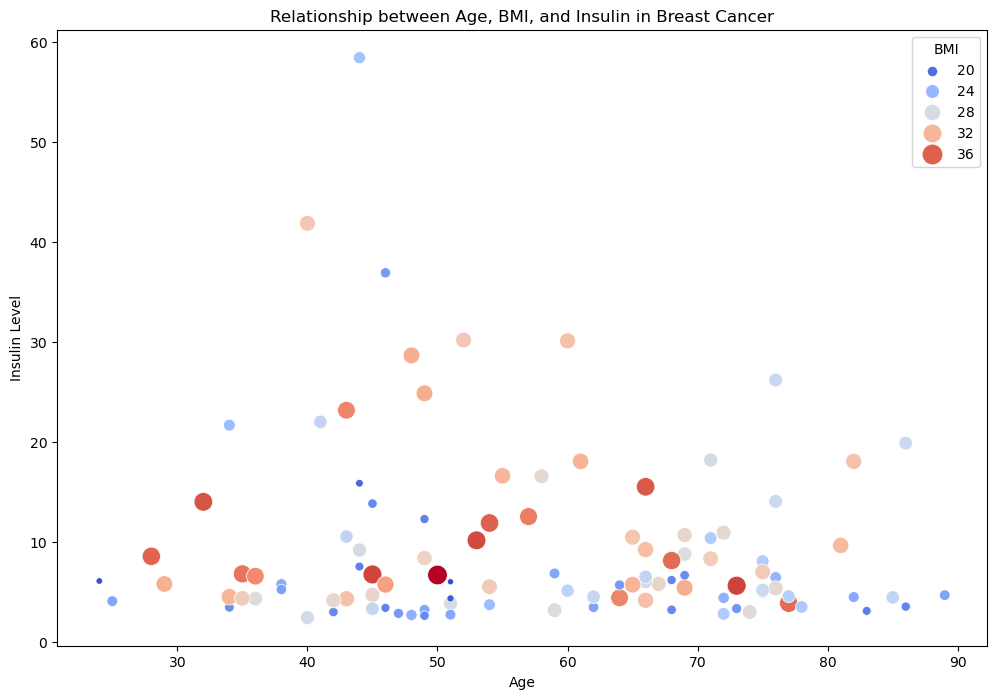

In [24]:
# Scatter plot to visualize the relationship between Age, BMI, and Insulin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Age', y='Insulin', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Age, BMI, and Insulin in Breast Cancer')
plt.xlabel('Age')
plt.ylabel('Insulin Level')
plt.legend(title='BMI')
plt.show()

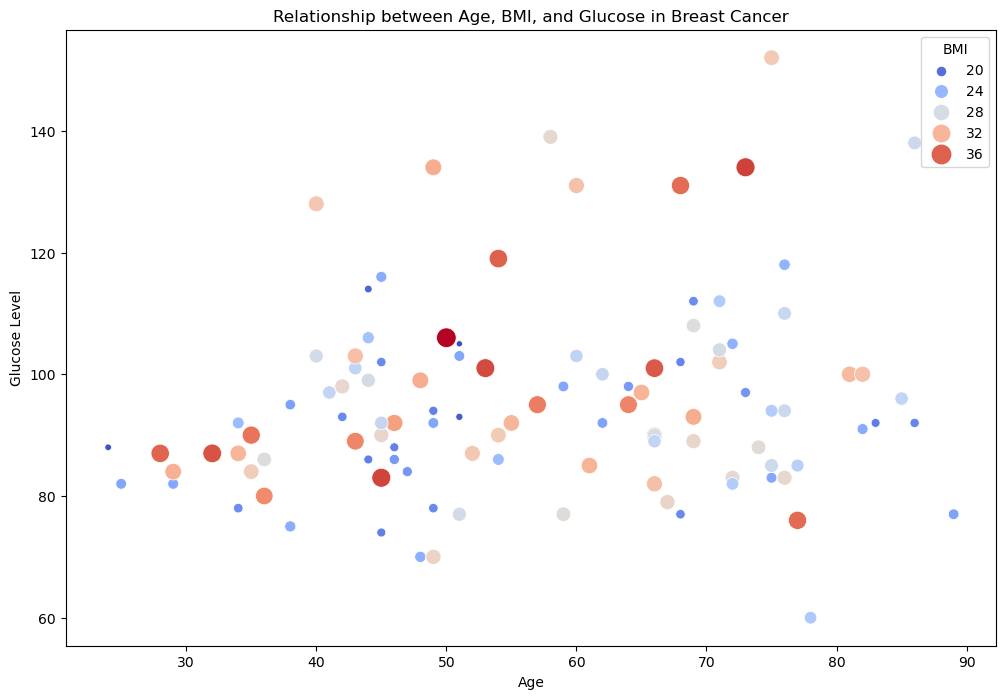

In [25]:
# Scatter plot to visualize the relationship between Age, BMI, and Glucose
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Age', y='Glucose', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Age, BMI, and Glucose in Breast Cancer')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend(title='BMI')
plt.show()

C:\Users\ENG.Elaf\AppData\Local\Temp\ipykernel_2984\3800635271.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bc, x='BMI', y='Leptin', palette='coolwarm')


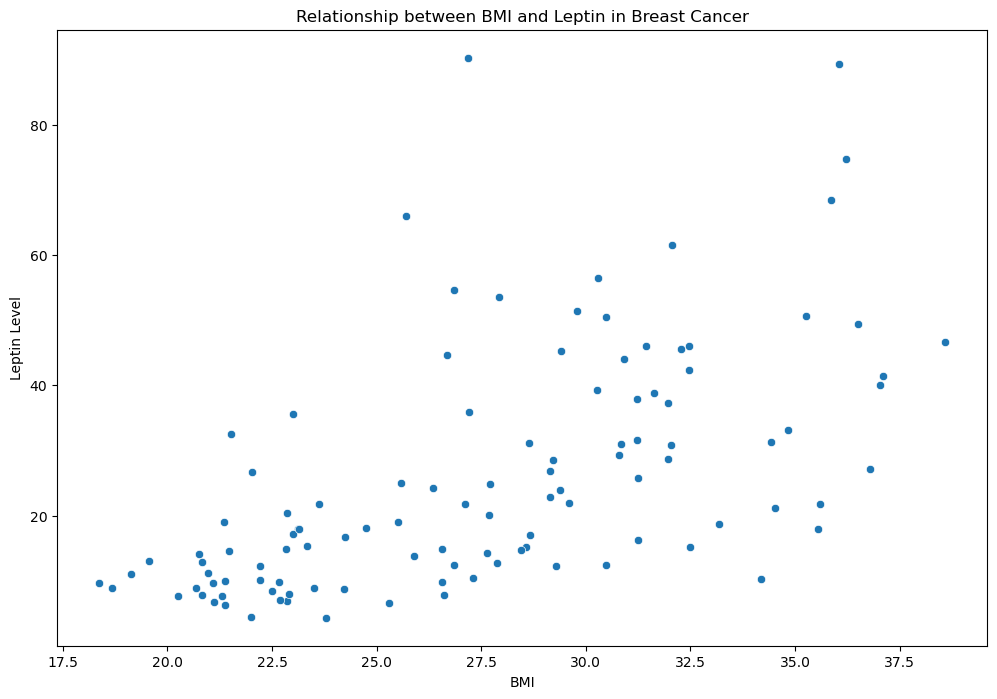

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='BMI', y='Leptin', palette='coolwarm')
plt.title('Relationship between BMI and Leptin in Breast Cancer')
plt.xlabel('BMI')
plt.ylabel('Leptin Level')
plt.show()

C:\Users\ENG.Elaf\AppData\Local\Temp\ipykernel_2984\158030412.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bc, x='Insulin', y='Leptin', palette='coolwarm')


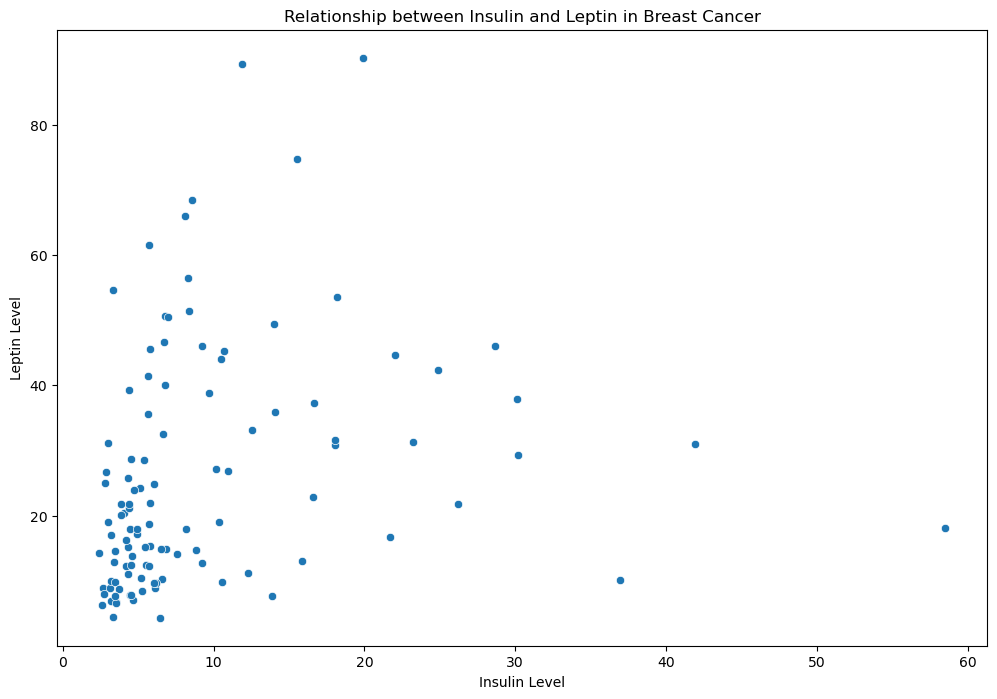

In [27]:
# Scatter plot to visualize the relationship between Insulin and Leptin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Insulin', y='Leptin', palette='coolwarm')
plt.title('Relationship between Insulin and Leptin in Breast Cancer')
plt.xlabel('Insulin Level')
plt.ylabel('Leptin Level')
plt.show()

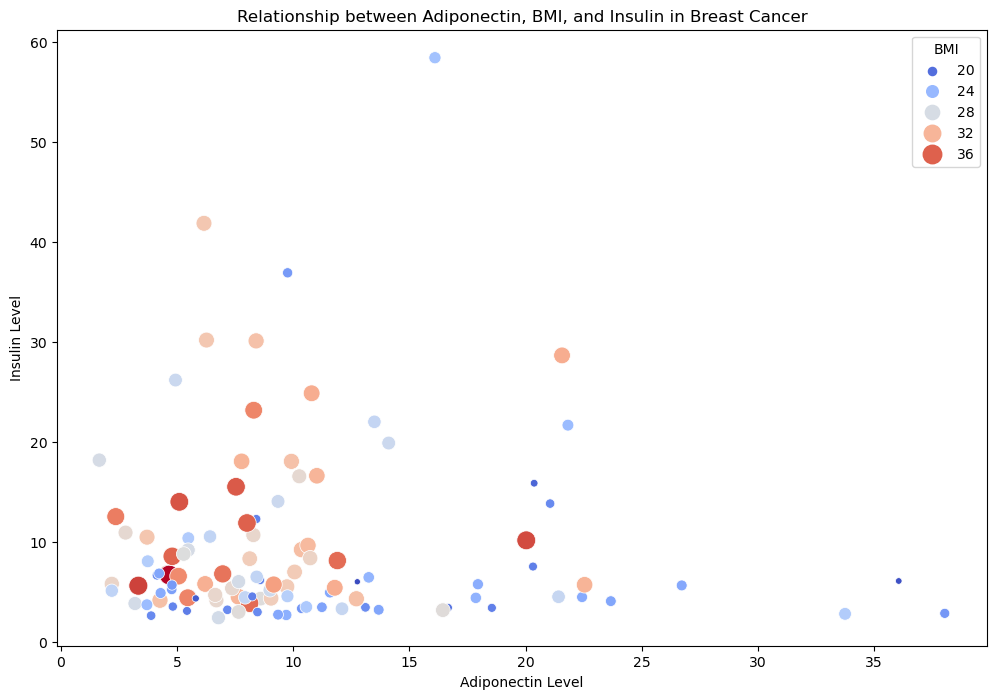

In [28]:
# Scatter plot to visualize the relationship between Adiponectin, BMI, and Insulin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Adiponectin', y='Insulin', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Adiponectin, BMI, and Insulin in Breast Cancer')
plt.xlabel('Adiponectin Level')
plt.ylabel('Insulin Level')
plt.legend(title='BMI')
plt.show()

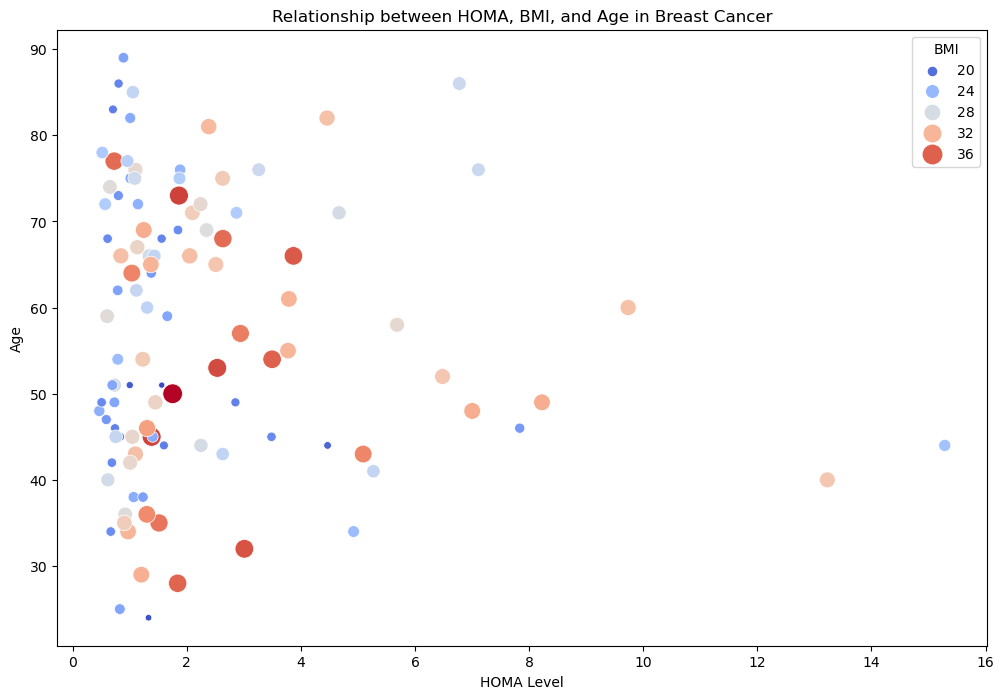

In [25]:
# Scatter plot to visualize the relationship between HOMA, BMI, and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='HOMA', y='Age', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between HOMA, BMI, and Age in Breast Cancer')
plt.xlabel('HOMA Level')
plt.ylabel('Age')
plt.legend(title='BMI')
plt.show()

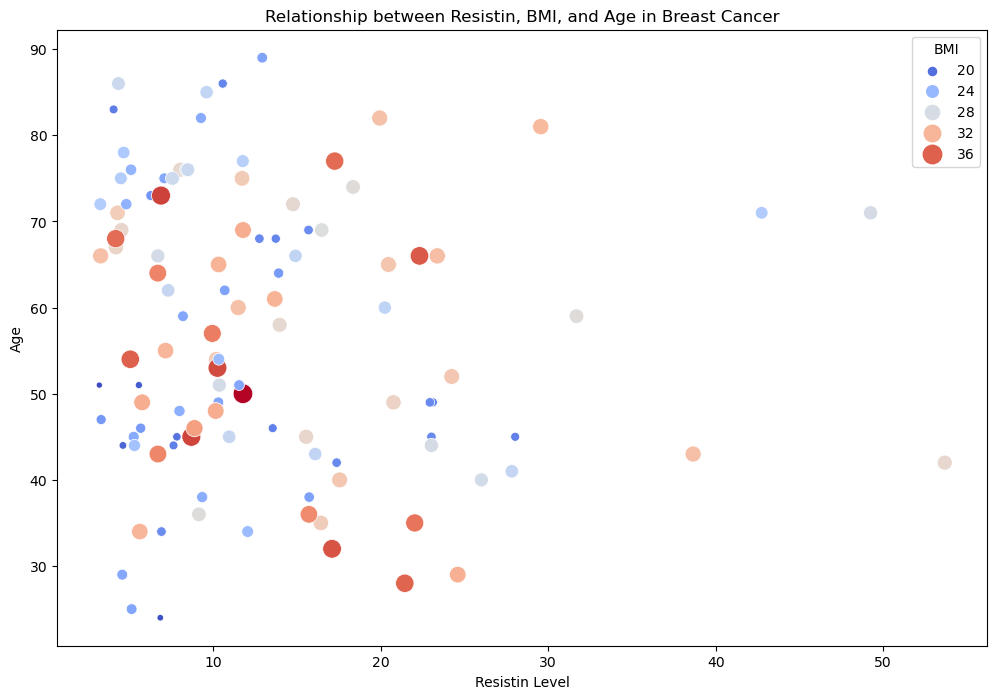

In [26]:
# Scatter plot to visualize the relationship between Resistin, BMI, and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Resistin', y='Age', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Resistin, BMI, and Age in Breast Cancer')
plt.xlabel('Resistin Level')
plt.ylabel('Age')
plt.legend(title='BMI')
plt.show()

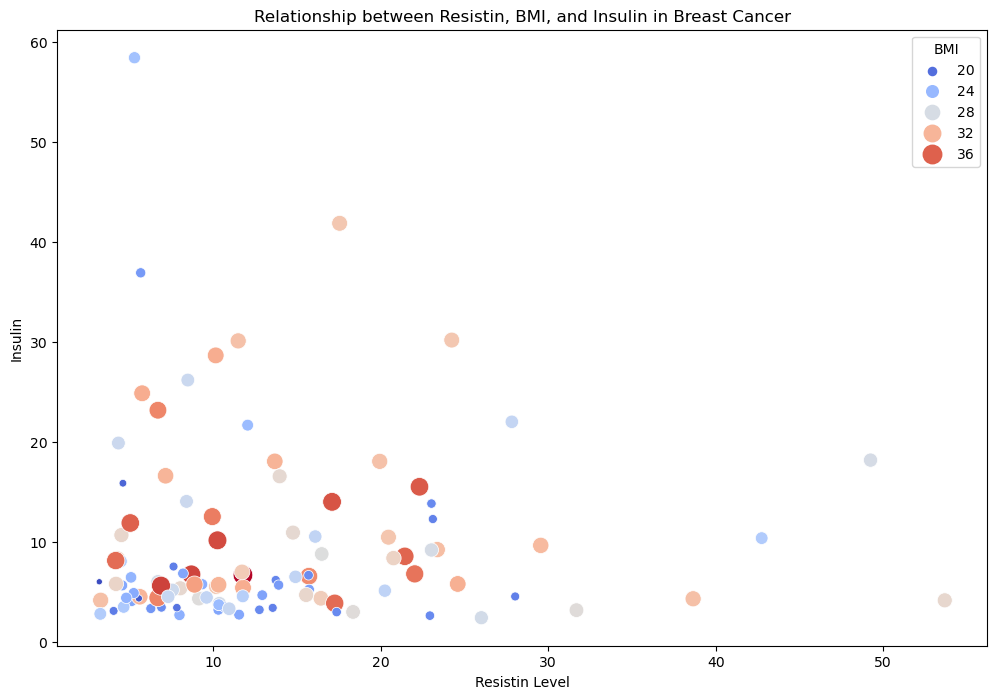

In [27]:
# Scatter plot to visualize the relationship between Resistin, BMI, and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Resistin', y='Insulin', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between Resistin, BMI, and Insulin in Breast Cancer')
plt.xlabel('Resistin Level')
plt.ylabel('Insulin')
plt.legend(title='BMI')
plt.show()

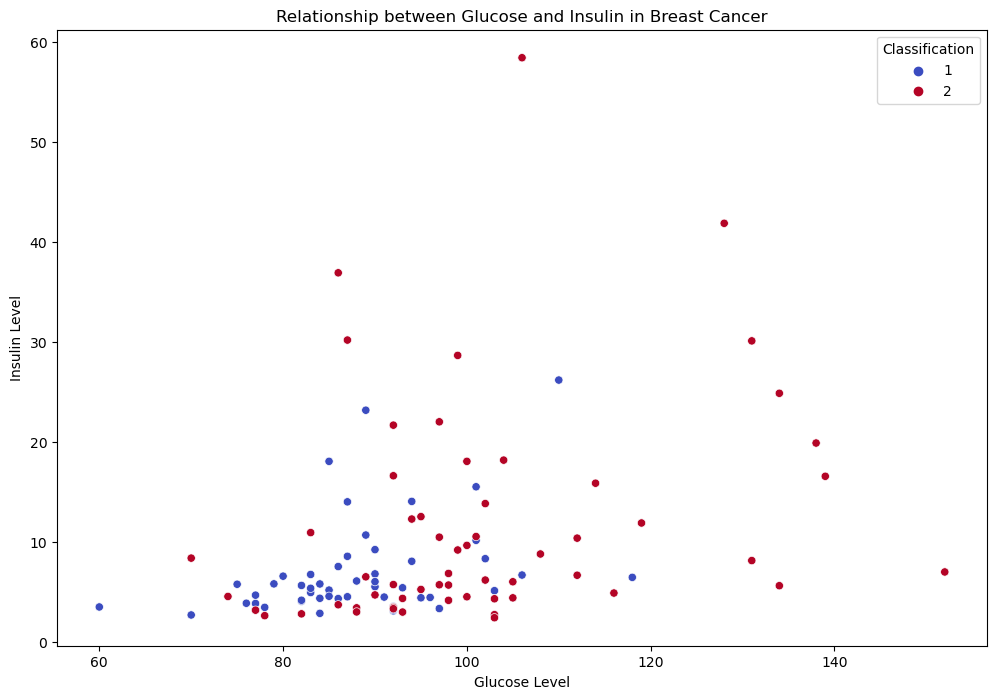

In [28]:
# Scatter plot to visualize the relationship between Glucose and Insulin
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='Glucose', y='Insulin', hue='Classification', palette='coolwarm')
plt.title('Relationship between Glucose and Insulin in Breast Cancer')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.legend(title='Classification')
plt.show()

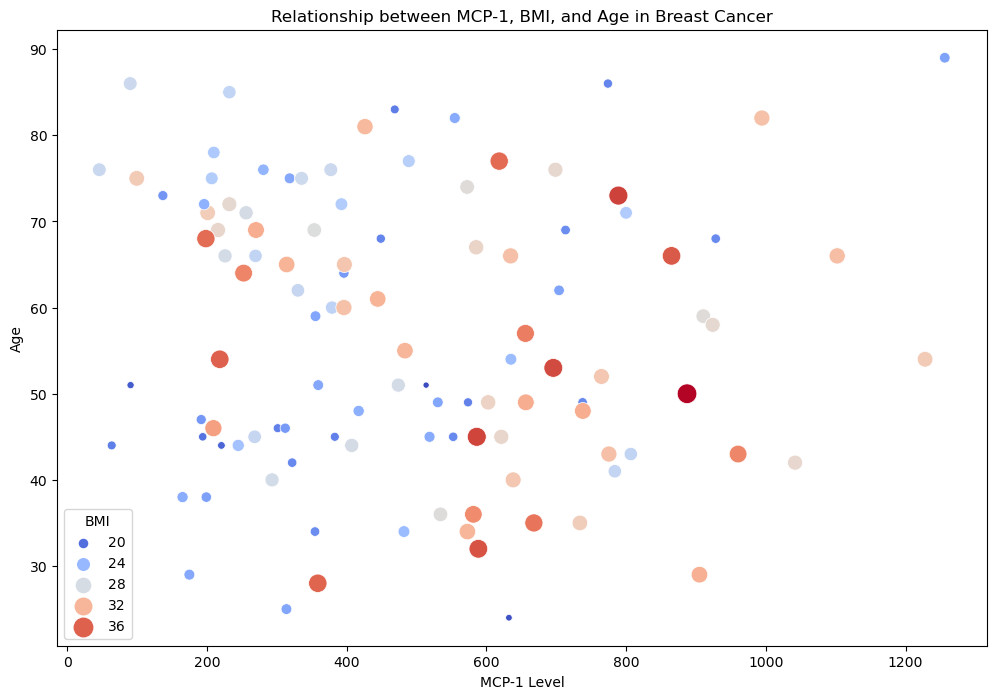

In [29]:
# Scatter plot to visualize the relationship between MCP-1, BMI, and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bc, x='MCP.1', y='Age', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Relationship between MCP-1, BMI, and Age in Breast Cancer')
plt.xlabel('MCP-1 Level')
plt.ylabel('Age')
plt.legend(title='BMI')
plt.show()

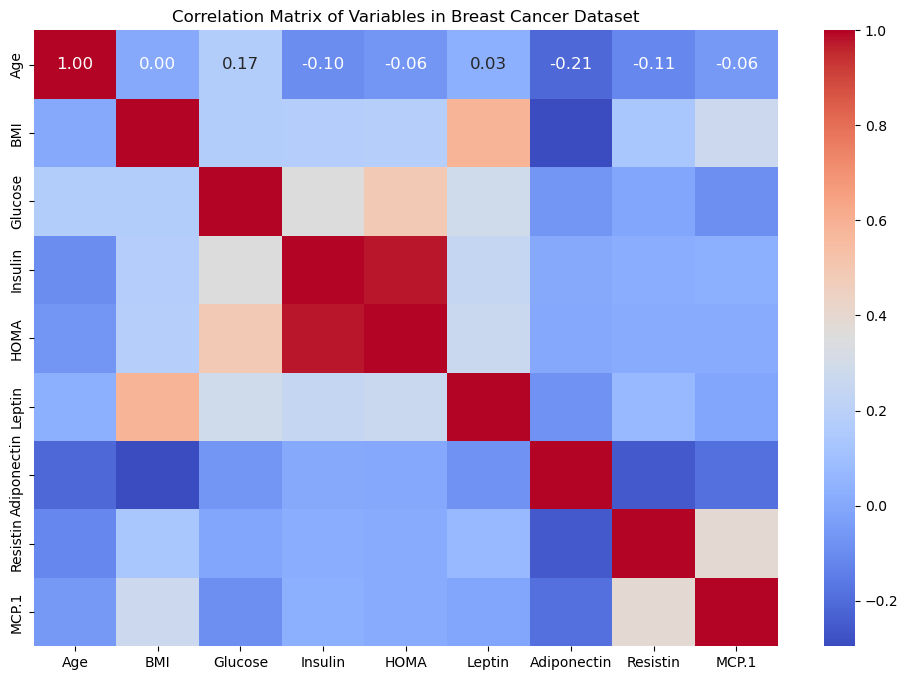

In [30]:

columns = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
data = bc[columns]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of Variables in Breast Cancer Dataset')
plt.show()

In [31]:
# Calculate correlation between features and target variable
correlation_matrix = bc.corr()
Classification_correlation = correlation_matrix['Classification'].drop('Classification')

print("Correlation with target variable (Classification):\n", Classification_correlation)

Correlation with target variable (Classification):
 Age           -0.063141
BMI           -0.132276
Glucose        0.429748
Insulin        0.253245
HOMA           0.290154
Leptin         0.008174
Adiponectin   -0.005362
Resistin       0.300029
MCP.1         -0.050827
Name: Classification, dtype: float64


C:\Users\ENG.Elaf\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ENG.Elaf\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ENG.Elaf\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ENG.Elaf\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

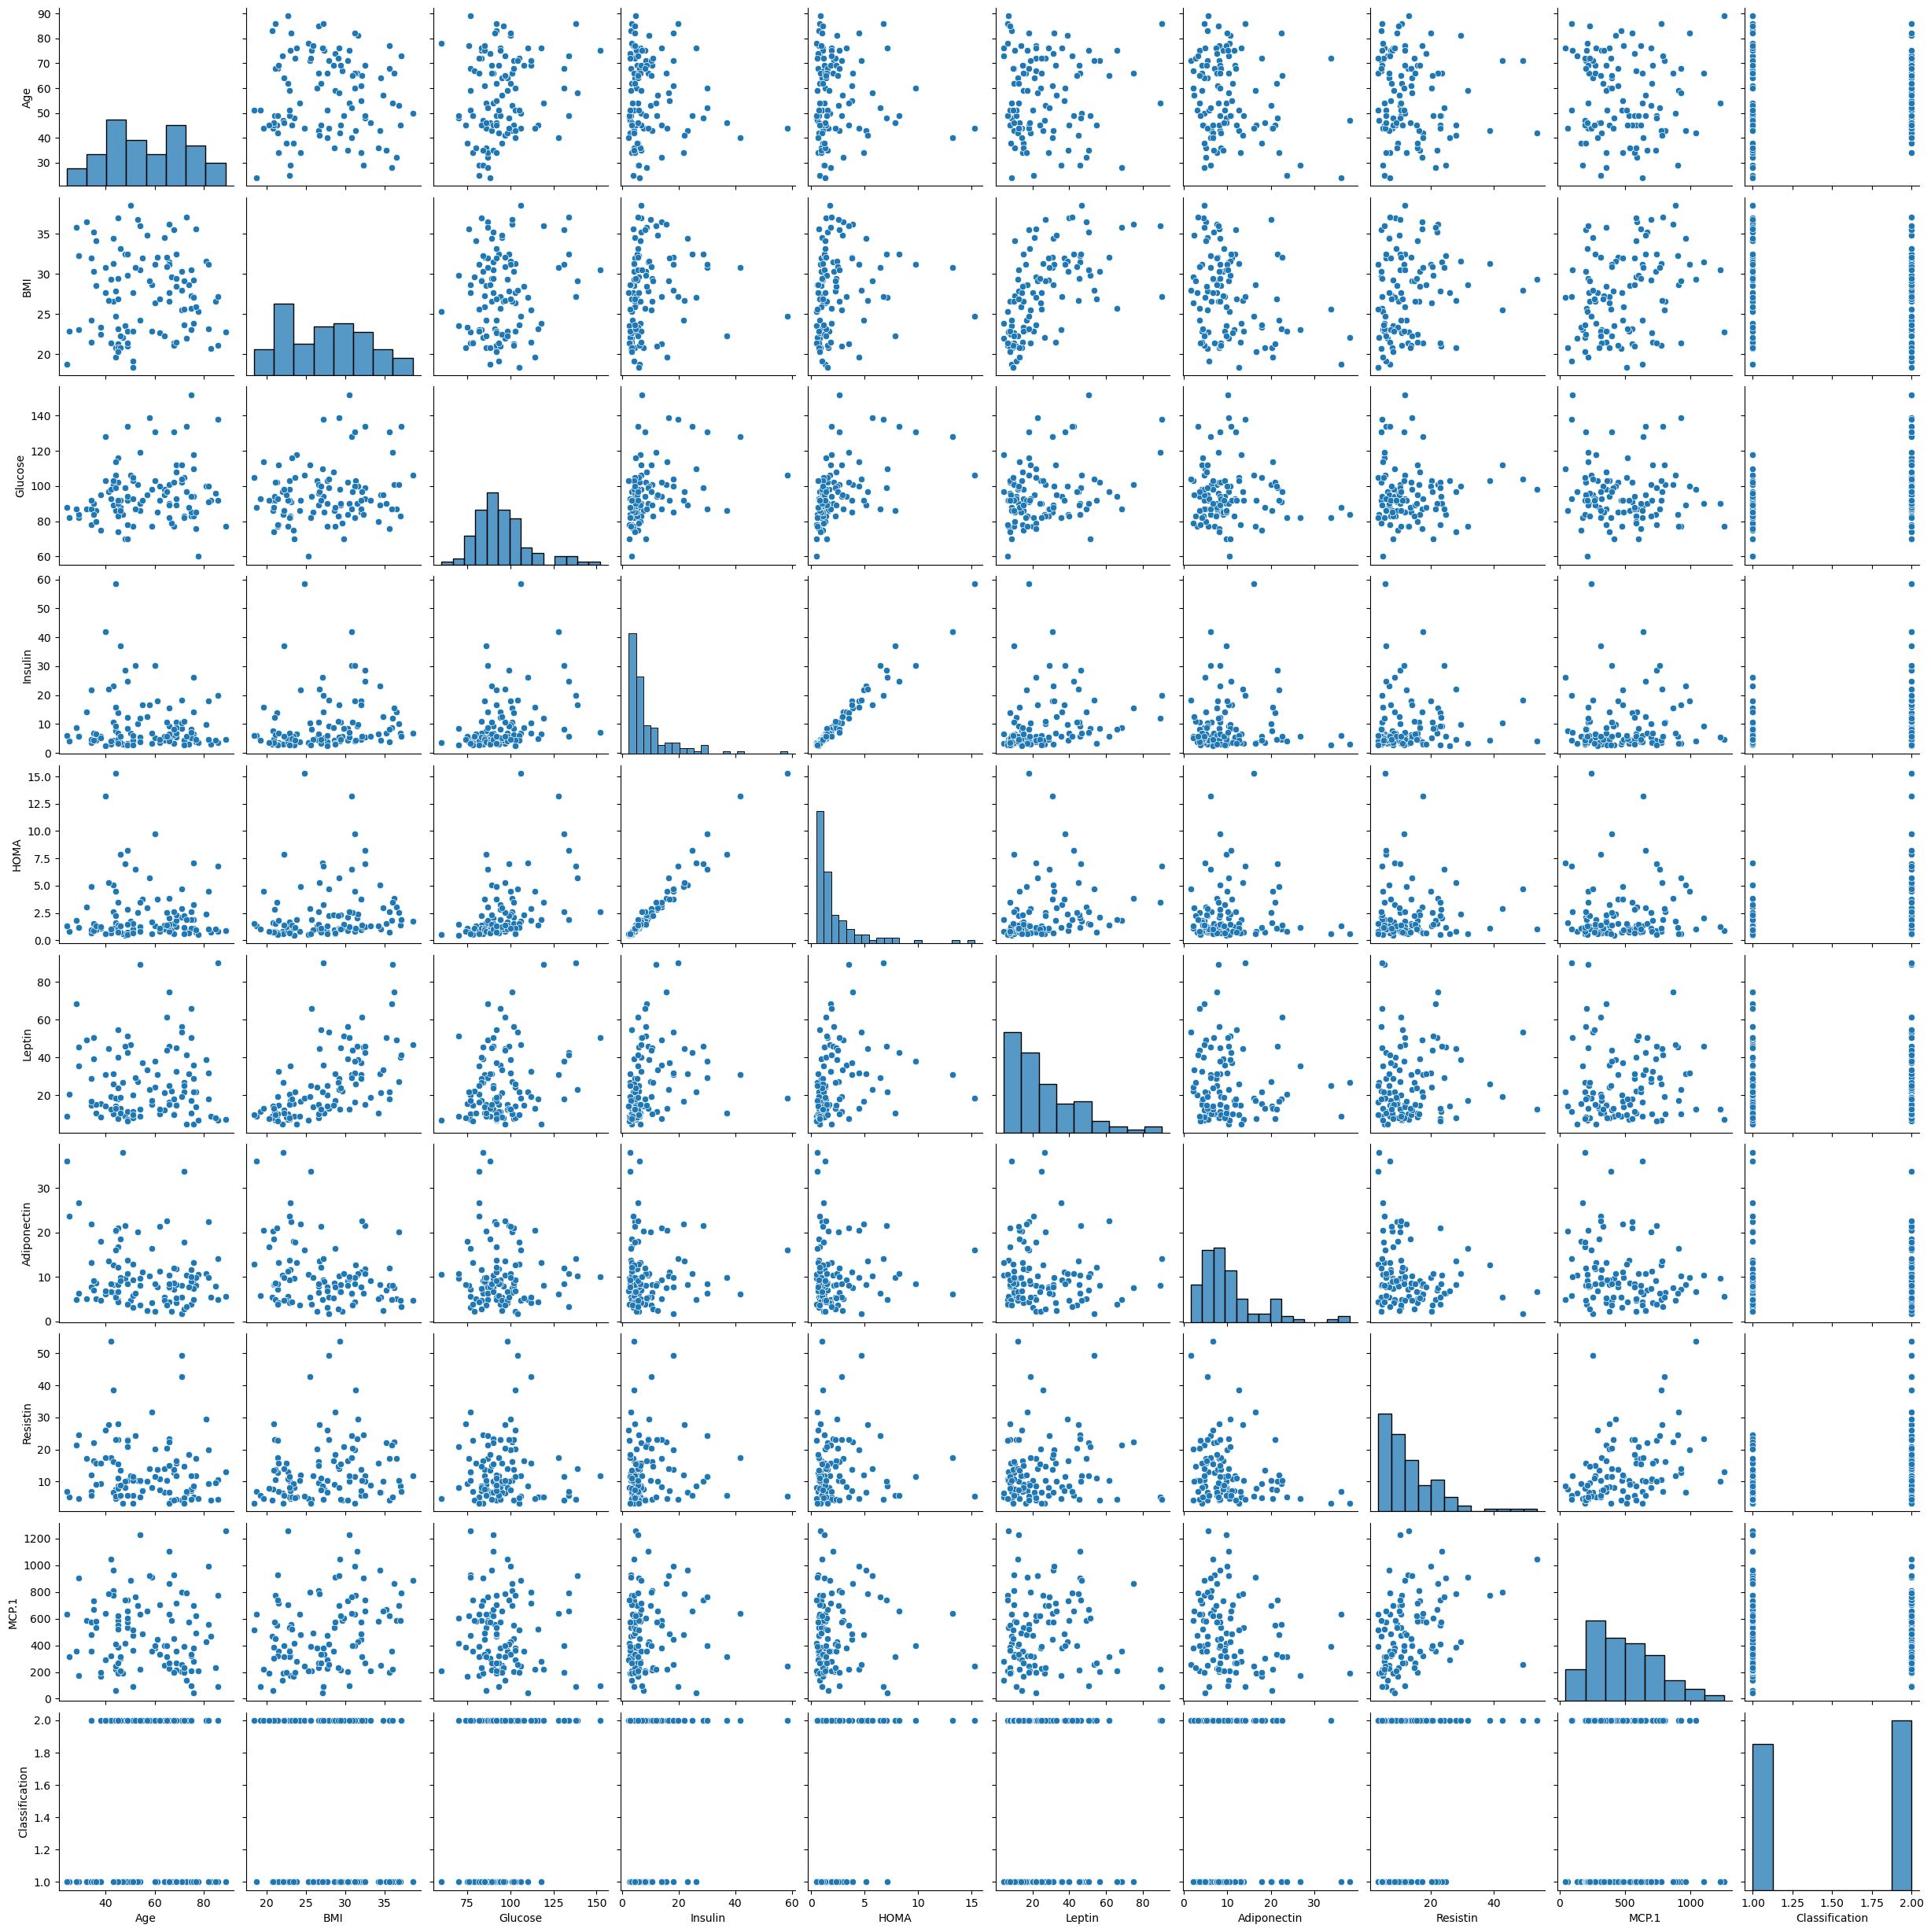

In [32]:
sns.pairplot(bc)

<Axes: >

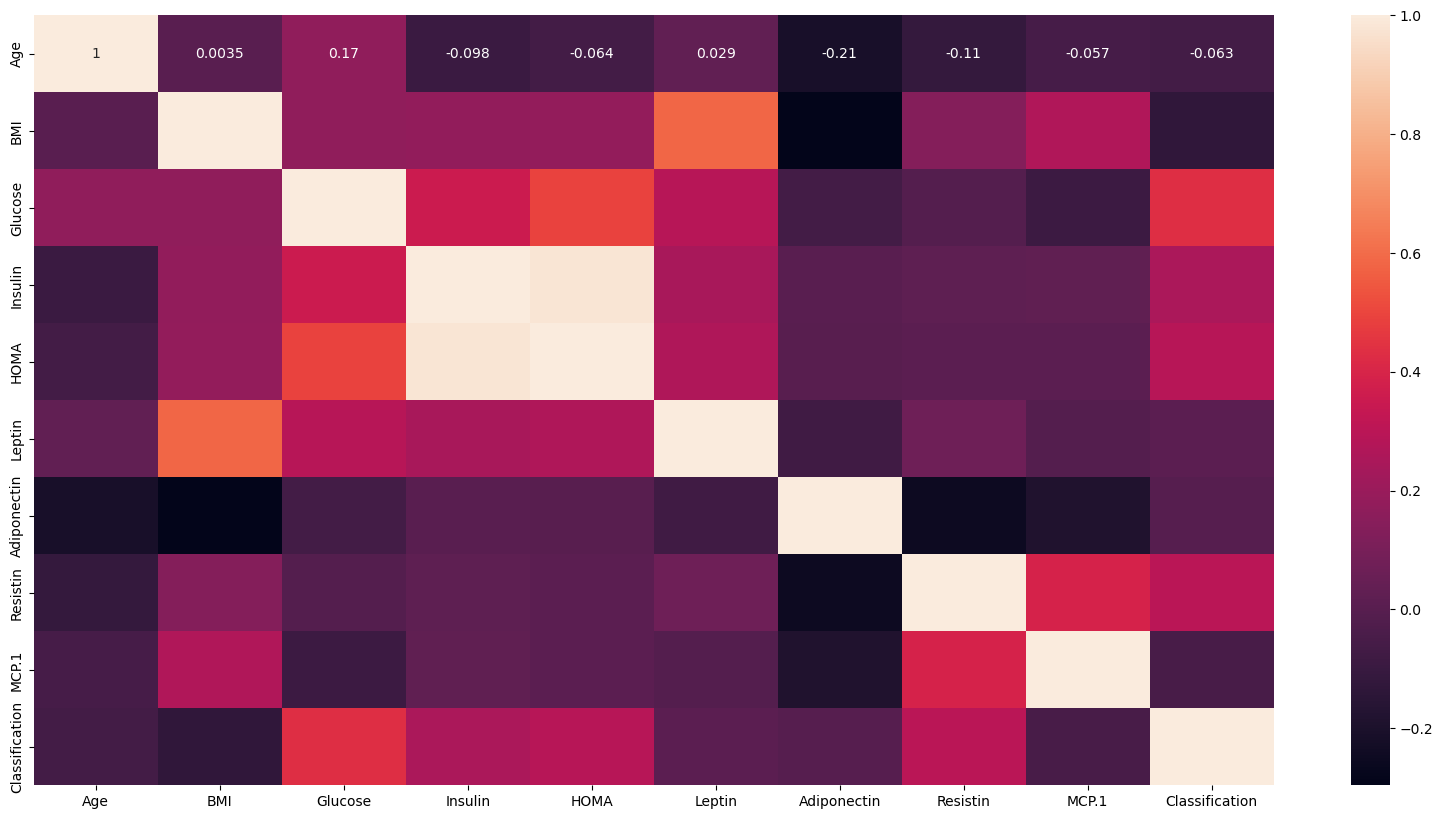

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(bc.corr(), annot=True)

In [34]:
bc['Classification'].value_counts()

Classification
2    59
1    51
Name: count, dtype: int64

In [37]:

# Define features and target
#X = bc[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]
#y = bc['Classification']  # corrected the typo here

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
#clf.fit(X_train, y_train)

# Feature importance
#feature_importance = clf.feature_importances_

# Select features based on importance
#sfm = SelectFromModel(clf, threshold=0.05)
#sfm.fit(X_train, y_train)

# Get selected feature names
#selected_features = X.columns[sfm.get_support()]

#print("Selected Features based on importance:", selected_features)


In [38]:
X = bc.drop('Classification', axis=1)
y = bc['Classification']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
def score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [44]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GaussianNB': GaussianNB(),}

In [45]:
model_scores = score(models, X_train, X_test, y_train, y_test)

In [46]:
model_scores

,Score
DecisionTreeClassifier,0.727273
RandomForestClassifier,0.772727
SVC,0.818182
GaussianNB,0.818182
LogisticRegression,0.863636


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report

In [48]:
model = LogisticRegression(random_state = 0)


In [49]:
model.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [50]:
y_pred = model.predict(X_test)

In [51]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy :  0.8636363636363636
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.91      0.83      0.87        12

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



In [31]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [32]:
import streamlit as st
import joblib
import numpy as np

In [33]:
model = joblib.load('breast_cancer_model.pkl')

In [34]:
st.title('Breast Cancer Prediction App')

2024-09-21 22:49:29.208 
  command:

    streamlit run C:\Users\ENG.Elaf\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()